## 환경설정 및 데이터 파일 업로드


colab 환경에서 그래프에 한글 폰트 사용을 위해 다음을 코드를 실행시킵니다.<br>
실행이 완료되면 메뉴의 [런타임]-[런타임다시시작]을 선택하고, 런타임 다시 시작창에서 [예]를 선택합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

내 컴퓨터에 있는 데이터 파일(엑셀파일)을 업로드 합니다.

In [ ]:
from google.colab import files
myfile = files.upload()      # 파일 업로드

Saving 삼양분식(L).csv to 삼양분식(L).csv


업로드된 파일을 사용할 수 있도록 준비하고, 간단히 내용을 확인합니다.
시작 부분의 데이터를 살펴보면 간단한 정보들을 확인할 수 있습니다.
또 len(data) 명령어로 데이터가 총 몇개의 행으로 되어 있는지 확인할 수 있습니다.

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(myfile['삼양분식(L).csv']))

data.head() # 처음 5개의 데이터를
data.tail() # 마지막 5개의 데이터를 확인

,날짜,요일,주문번호,종류,메뉴이름,수량,가격,금액
4846,2021-03-14,일,1887,면류,치즈라면,1,5000,5000
4847,2021-03-14,일,1888,만두류,고기만두,1,4000,4000
4848,2021-03-14,일,1888,김밥,땡초김밥,1,3000,3000
4849,2021-03-14,일,1888,김밥,새우김밥,1,3500,3500
4850,2021-03-14,일,1888,김밥,참치김밥,1,3000,3000


In [ ]:
len(data) # 데이터의 행수 세기

4851

In [ ]:
### 문제 풀기 ###
# 데이터 항목(속성)에는 무엇이 있는가?
print("날짜, 요일, 주문번호, 종류, 메뉴이름, 수량, 가격, 금액")

# 데이터의 개수는 몇 개인가?
print(f"{len(data)}개")

날짜, 요일, 주문번호, 종류, 메뉴이름, 수량, 가격, 금액
4851개


In [ ]:
### 문제 풀기 ###
# 다음의 문제 상황을 해결하기 위해 관련 있는 데이터 항목(속성)을 선택해 보자.
# 매출에 영향을 덜 주면서 휴일을 정하는 문제: 요일, 금액
# 매출에 영향을 덜 주면서 메뉴를 줄이는 문제: 메뉴이름, 금액

## 데이터 분석 및 시각화

요일별 매출 금액 구하기

In [ ]:
print(data.iloc[5])

days = ['월', '화', '수', '목', '금', '토', '일']   # 요일 표시용
amount = [0] * 7            # 요일별 매출 저장용
a=data.iloc[0]              # data의 첫번째 행만
print(a['메뉴이름'])
for i in range(len(data.index)):    # 데이터 파일의 첫 행부터 마지막 행까지 반복
  row = data.iloc[i]                # 데이터 행의 값을 row에 저장
  idx = days.index(row['요일'])
  amount[idx] += row['금액']               # 데이터 행의 요일과 같은 매출금액 증가시키기

for i in range(7):
  print(days[i], amount[i])

날짜      2021-01-04
요일               월
주문번호             3
종류              김밥
메뉴이름          원조김밥
수량               1
가격            2500
금액            2500
Name: 5, dtype: object
과일주스
월 2341000
화 2862500
수 3059000
목 3599000
금 3870000
토 5801500
일 6008500


요일별 매출 금액 막대그리프로 시각화하기

In [ ]:
### 문제 풀기 ###
# 매출 금액이 가장 적은 요일과 금액, 매출 금액이 가장 많은 요일과 매출 금액은?
# 답: 월:2341000, 일:6008500

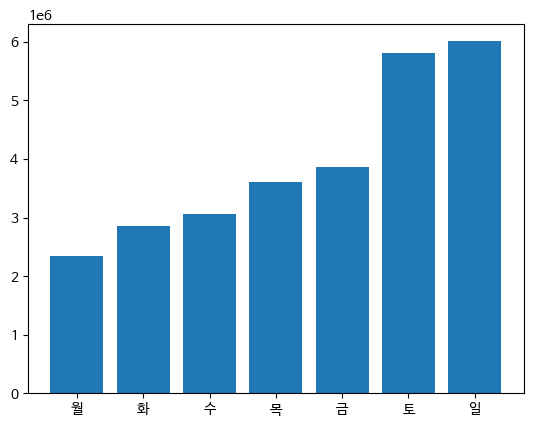

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')     # 한글 사용을 위한 폰트 지정
plt.bar(days, amount)                         # 요일과 매출금액으로 막대 그래프 그리기
plt.show()

판매하는 음식종류 확인하기

In [ ]:
# 음식종류를 넣을 kinds 빈 리스트 만들기
kinds = []

for i in range(len(data.index)):
  row = data.iloc[i]
  kinds.append(row['종류'])
print(kinds)

# 중복값 제거
kinds = list(set(kinds))
# 종류들을 확인하기
print(kinds)
# 종류가 몇가지인지 출력
print(len(kinds))

['음료', '면류', '김밥', '음료', '김밥', '김밥', '김밥', '만두류', '한식', '김밥', '만두류', '면류', '빵류', '김밥', '김밥', '면류', '김밥', '김밥', '음료', '김밥', '김밥', '음료', '튀김류', '김밥', '음료', '튀김류', '김밥', '튀김류', '음료', '면류', '김밥', '만두류', '김밥', '한식', '면류', '김밥', '면류', '면류', '면류', '만두류', '한식', '만두류', '김밥', '만두류', '김밥', '만두류', '김밥', '음료', '김밥', '만두류', '만두류', '음료', '김밥', '음료', '김밥', '튀김류', '한식', '한식', '만두류', '한식', '김밥', '한식', '김밥', '한식', '만두류', '한식', '만두류', '김밥', '음료', '만두류', '김밥', '김밥', '만두류', '김밥', '김밥', '만두류', '면류', '김밥', '김밥', '만두류', '면류', '튀김류', '김밥', '김밥', '한식', '김밥', '한식', '면류', '튀김류', '튀김류', '김밥', '김밥', '면류', '김밥', '튀김류', '김밥', '한식', '한식', '김밥', '김밥', '김밥', '김밥', '만두류', '김밥', '음료', '한식', '만두류', '음료', '김밥', '만두류', '만두류', '김밥', '김밥', '면류', '김밥', '김밥', '한식', '음료', '김밥', '한식', '튀김류', '김밥', '김밥', '김밥', '김밥', '만두류', '음료', '만두류', '김밥', '한식', '튀김류', '김밥', '면류', '김밥', '김밥', '만두류', '김밥', '한식', '김밥', '김밥', '김밥', '김밥', '한식', '김밥', '튀김류', '김밥', '한식', '만두류', '만두류', '김밥', '김밥', '김밥', '면류', '김밥', '김밥', '김밥', '김밥', '만두류', '한식', '김밥', '김

판매하는 음식종류별 주문수량과 판매금액 확인하기

In [ ]:
orders = [0] * 8     # 음식종류별 주문수량 저장용
amount = [0]* 8       # 음식종류별 매출금액 저장용

for i in range(len(data.index)):    # 데이터 파일의 첫 행부터 마지막 행까지 반복
  row = data.iloc[i]                # 데이터 행의 값을 row에 저장
  idx = kinds.index(row['종류'])
  orders[idx] += row['수량'] # 데이터 행의 요일과 같은 주문수량 증가시키기
  amount[idx] += row['금액']        # 데이터 행의 요일과 같은 매출금액 증가시키기

for i in range(8):
  print(kinds[i], orders[i], amount[i] )# 종류, 주문수량, 매출 금액 출력

만두류 985 4914000
음료 218 438000
한식 640 4229500
떡볶이 372 1860000
김밥 3583 10823500
튀김류 301 2204000
빵류 59 147500
면류 585 2925000


판매하는 음식종류별 주문수량 시각화하기

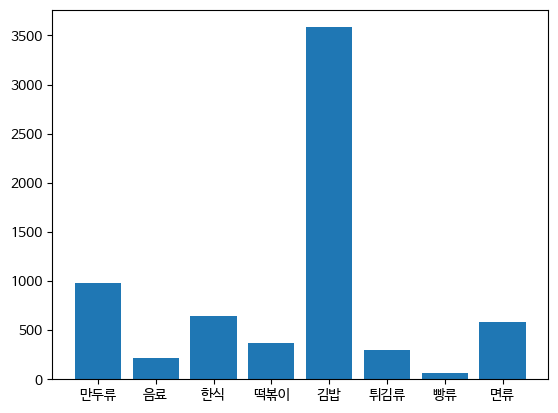

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 한글 사용을 위한 폰트 지정
plt.bar(kinds, orders)   # x축: kinds, y축: 주문수량 막대그래프 시각화
plt.show()

판매하는 음식종류별 판매금액 시각화하기

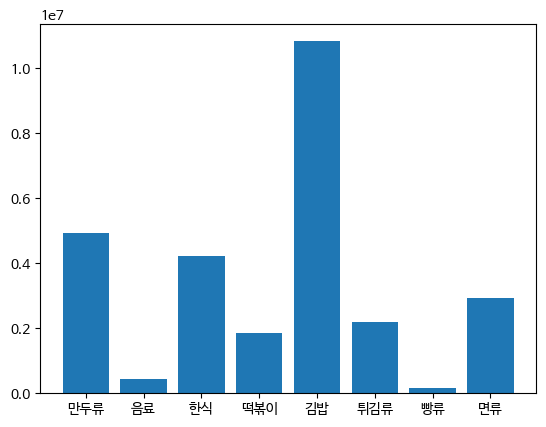

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 한글 사용을 위한 폰트 지정
plt.bar(kinds, amount)                      # x축: kinds, y축: 판매금액 막대그래프 시각화
plt.show()


처음 문제: 은지는 부모님이 식당을 운영하면서 일이 너무 많아 힘들어 하시는 모습을 보고 걱정이 많다. 그래서 일을 줄이고 휴일을 정해서 쉬는 시간을 가지라고 부모님께 말씀드리지만 늘 괜찮다고만 하신다. 은지는 식당의 주문 데이터 분석을 통해 메뉴를 줄여 전문성을 살리고, 매출에 영향이 적은 날을 골라 휴일로 정하는 등 데이터 분석 결과를 근거로 부모님을 설득하고자 한다. 지금부터 실습한 결과를 보고 부모님을 설득해 보자.

In [ ]:
# 답안 작성(각 줄의 맨 앞에 #을 쓰고 작성)
# 월요일은 다른 요일에 비해서 매출 금액이 적으니 휴일로 정해도 된다